In [70]:
import pandas as pd
import matplotlib
from ggplot import *
%matplotlib notebook

surveys = pd.read_csv("surveys.csv")
species = pd.read_csv("species.csv")
joined = pd.merge(left = surveys, right = species, left_on = "species_id", right_on = "species_id")
joined.to_csv("surveys_complete.csv")

In [74]:
surveys = pd.read_csv("surveys_complete.csv")
surveys

,Unnamed: 0,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,2,22,7,17,1977,15,NL,F,31.0,NaN,Neotoma,albigula,Rodent
3,3,38,7,17,1977,17,NL,M,33.0,NaN,Neotoma,albigula,Rodent
4,4,72,8,19,1977,2,NL,M,31.0,NaN,Neotoma,albigula,Rodent
5,5,106,8,20,1977,12,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent
6,6,107,8,20,1977,18,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent
7,7,121,8,21,1977,15,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent
8,8,171,9,11,1977,12,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent
9,9,194,9,12,1977,11,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent


<IPython.core.display.Javascript object>


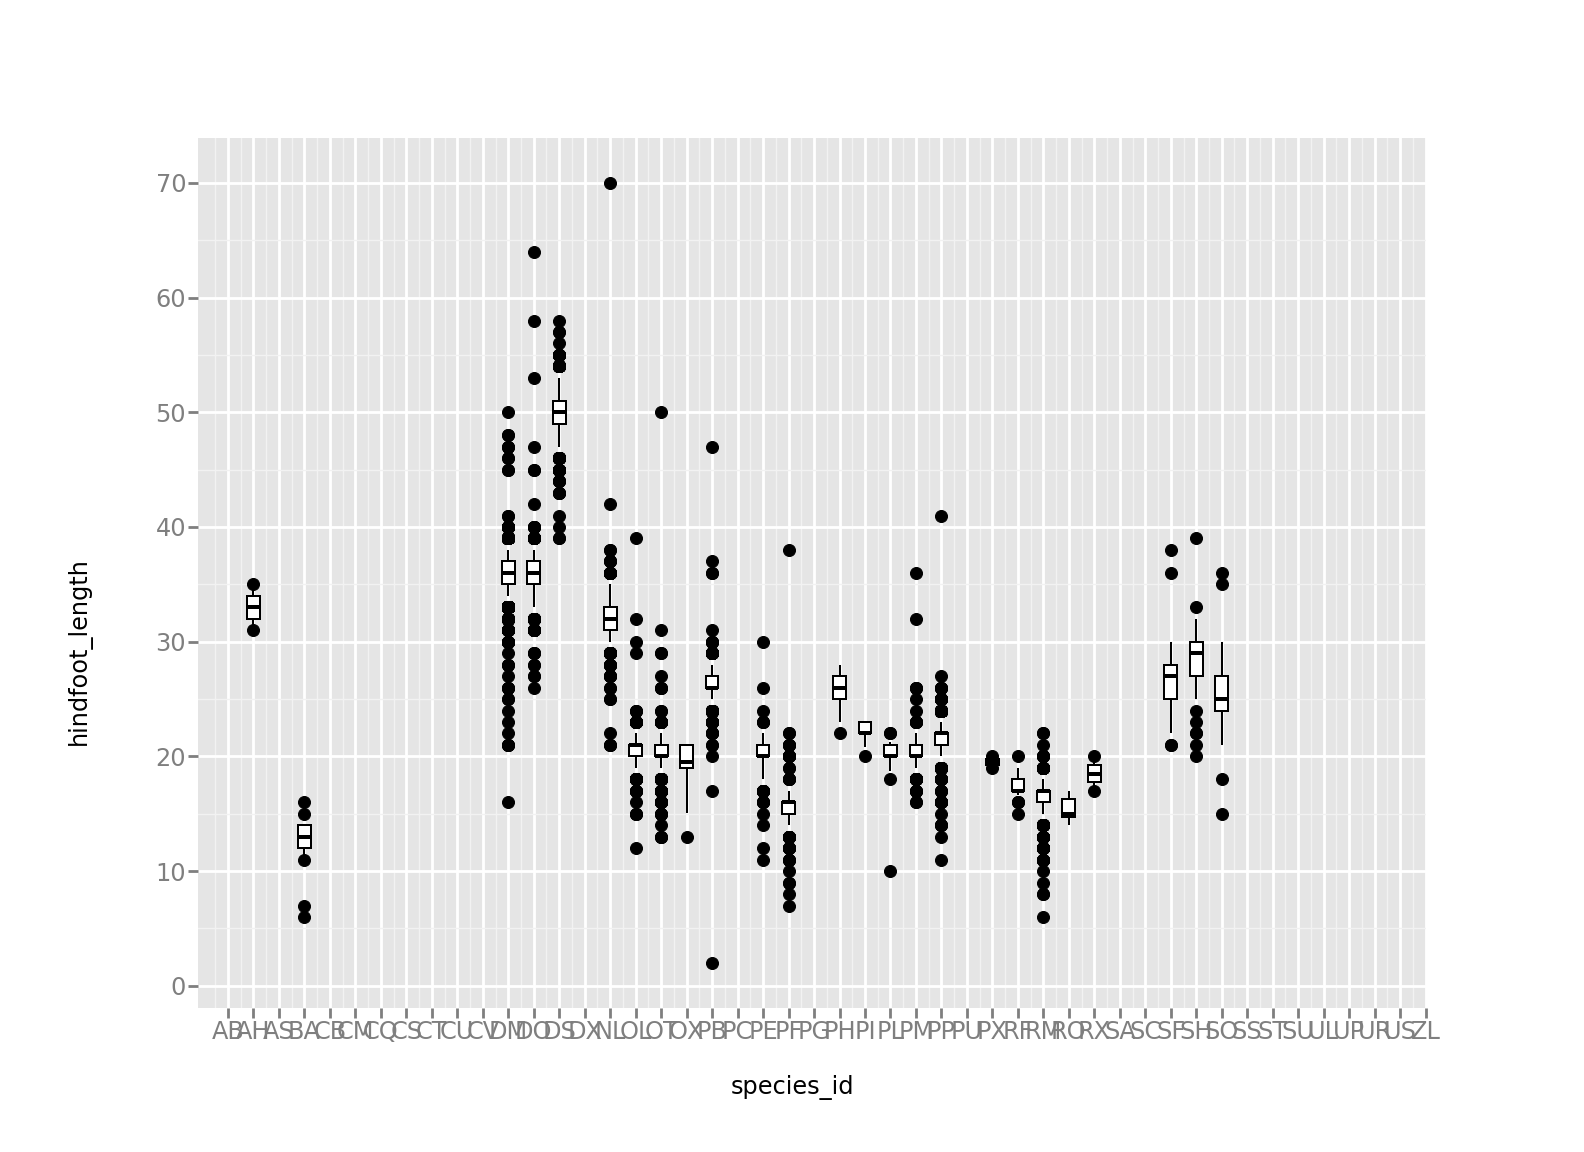

<ggplot: (326170814)>

In [75]:
ggplot(aes(x = "species_id", y = "hindfoot_length"), data = surveys) + geom_boxplot()

<IPython.core.display.Javascript object>


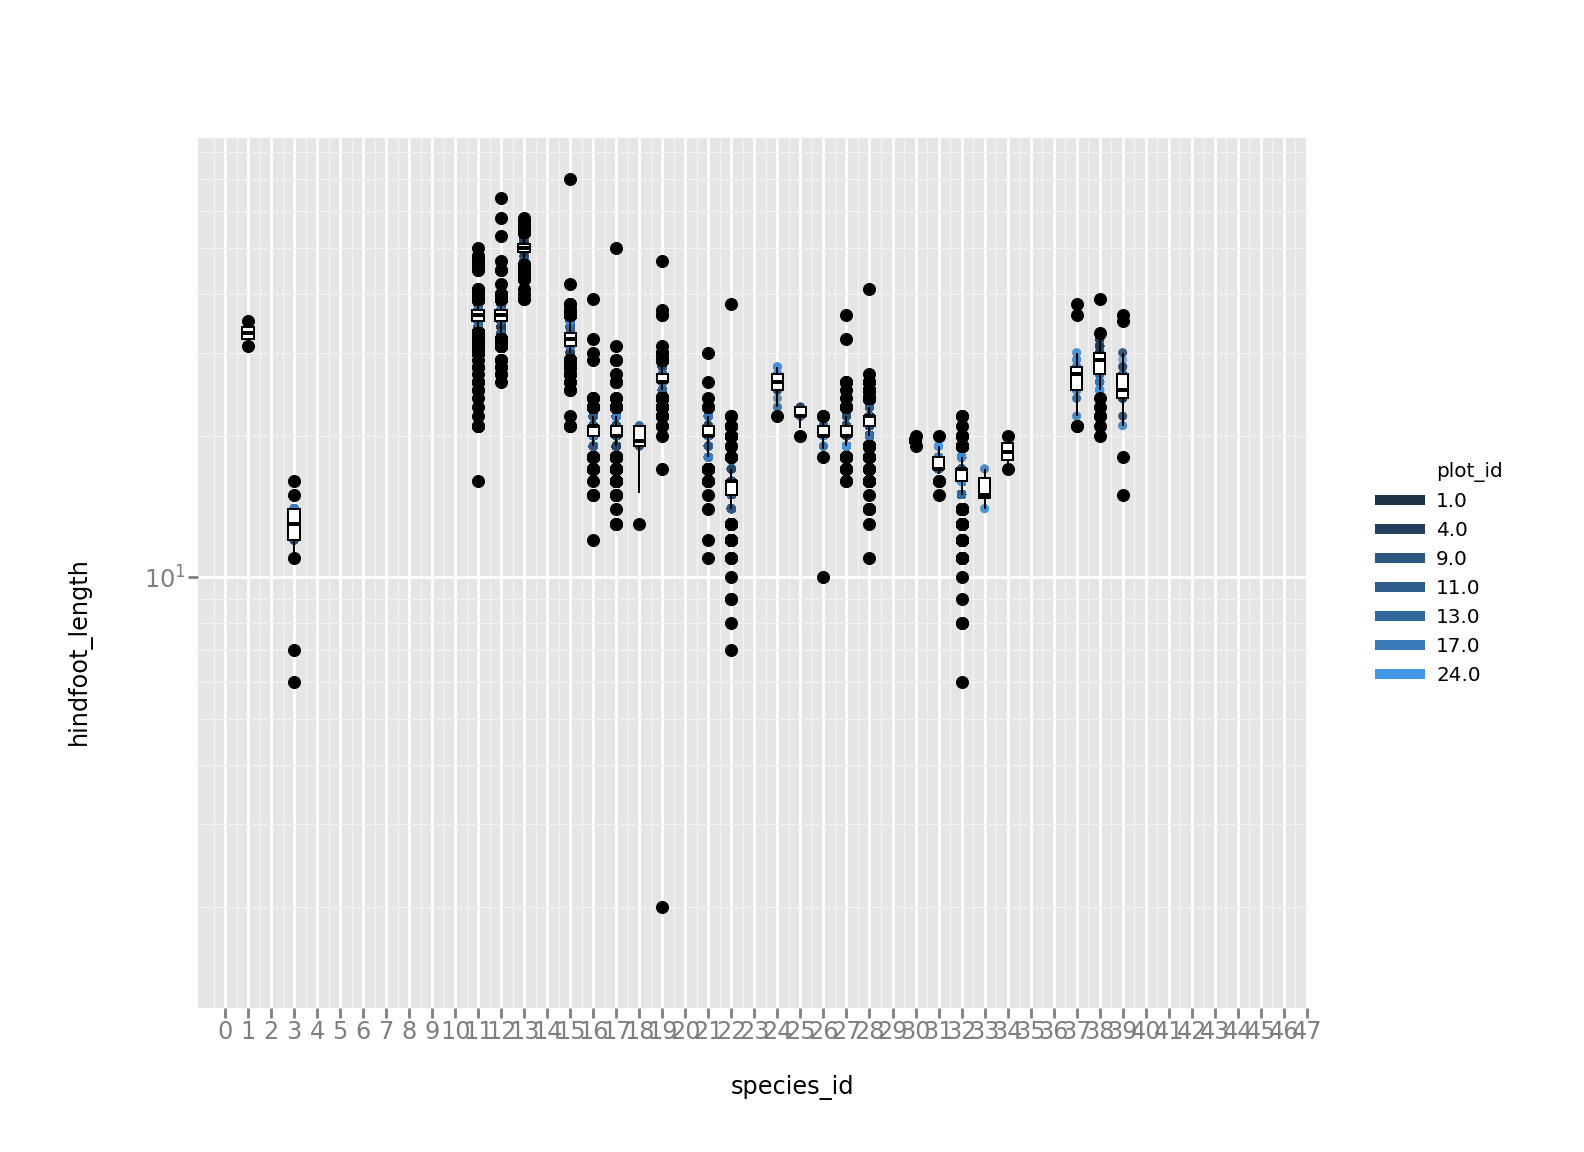

<ggplot: (-9223372036514973717)>

In [76]:
surveys['species_factor'] = surveys['species_id'].astype('category').cat.codes

xlabels = set(surveys['species_id'].values)
xcodes = sorted(set(surveys['species_factor'].values))

ggplot(aes(x = 'species_factor', y = 'hindfoot_length', color = "plot_id"),data = surveys) + \
    geom_point(position='jitter',alpha=0.7,jittersize=0.4) + \
        scale_x_continuous(breaks=xcodes, labels=xlabels) + \
                         xlab('species_id') + scale_y_log(base = 10) + geom_boxplot(alpha=0)

In [89]:
yearly = surveys[["year", "species_id", "species"]].groupby(["year", "species_id"]).count().reset_index()

In [82]:
yearly.columns = ["year", "species_id", "n"]

<IPython.core.display.Javascript object>


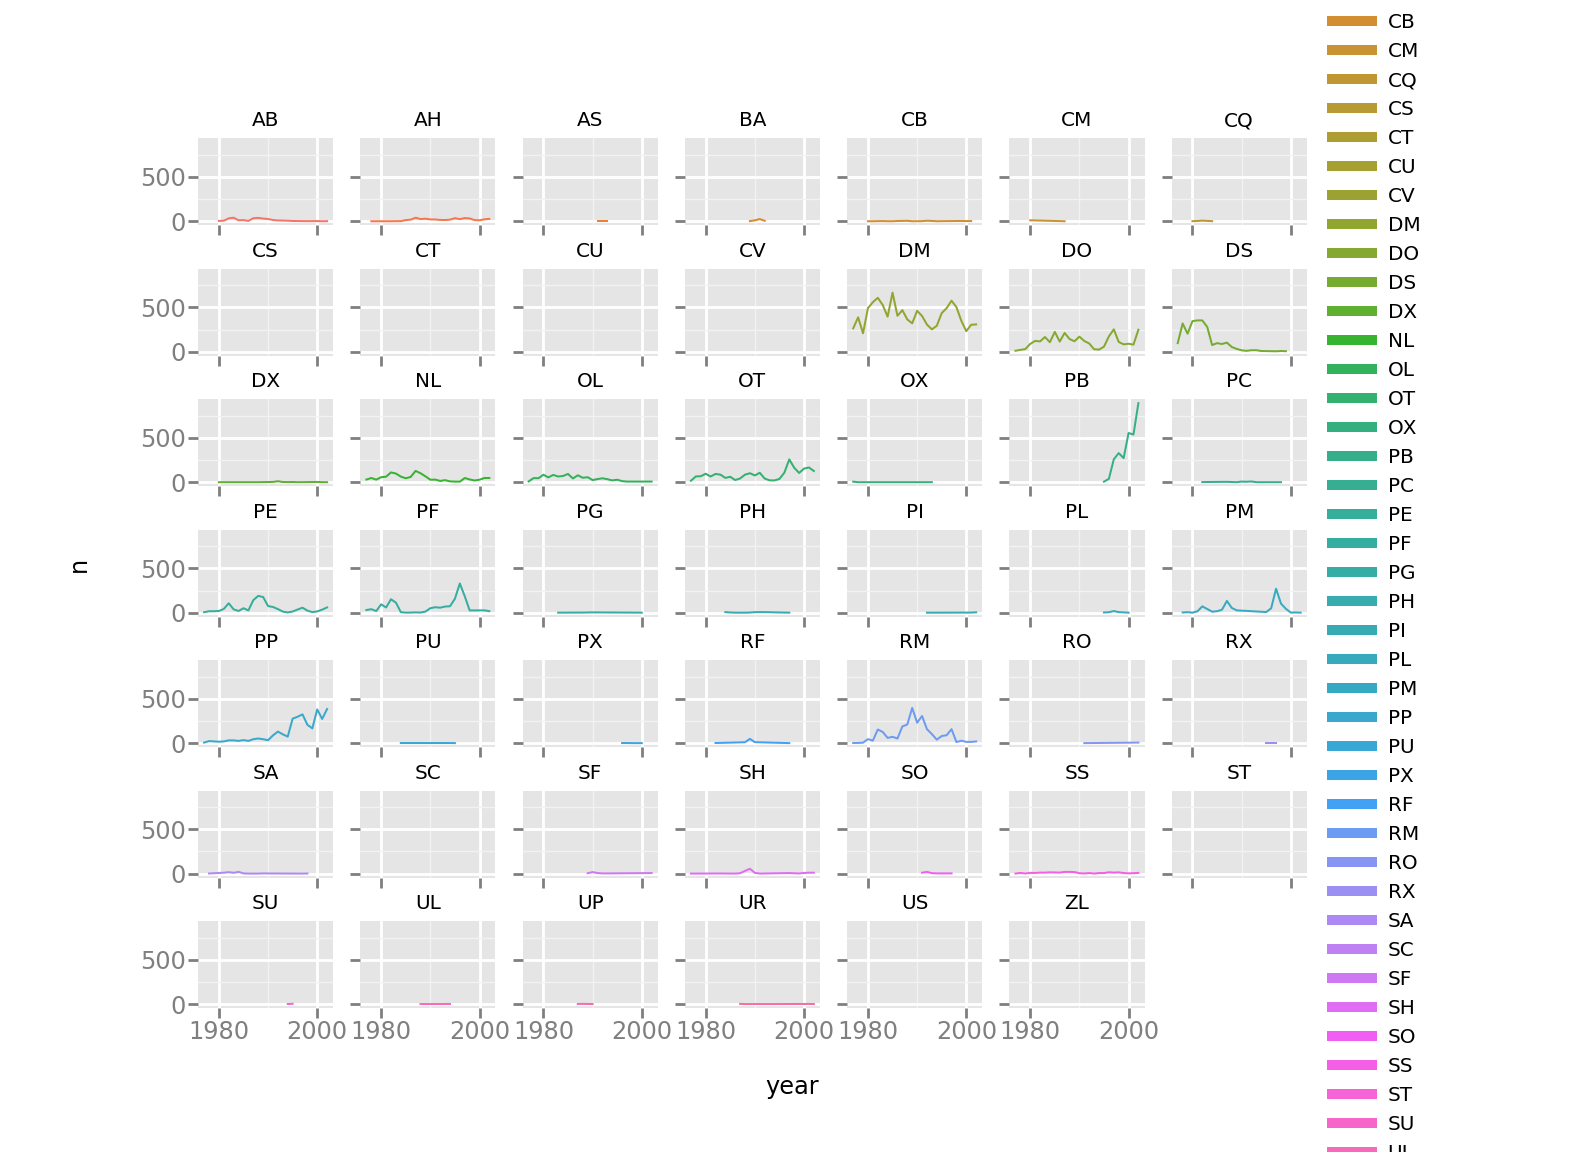

<ggplot: (-9223372036507923638)>

In [87]:
ggplot(aes(x = "year", y = "n", group = "species_id", color = "species_id"), data = yearly) + geom_line() + facet_wrap("species_id")

In [93]:
yearly_sex_counts = surveys.groupby( ['year','species_id', 'sex']).count()
yearly_sex_counts['n']  = yearly_sex_counts['record_id']
yearly_sex_counts = yearly_sex_counts['n'].reset_index()
yearly_sex_counts

,year,species_id,sex,n
0,1977,DM,F,104
1,1977,DM,M,152
2,1977,DO,F,10
3,1977,DO,M,2
4,1977,DS,F,58
5,1977,DS,M,34
6,1977,NL,F,1
7,1977,NL,M,4
8,1977,OL,F,2
9,1977,OT,F,1


<IPython.core.display.Javascript object>


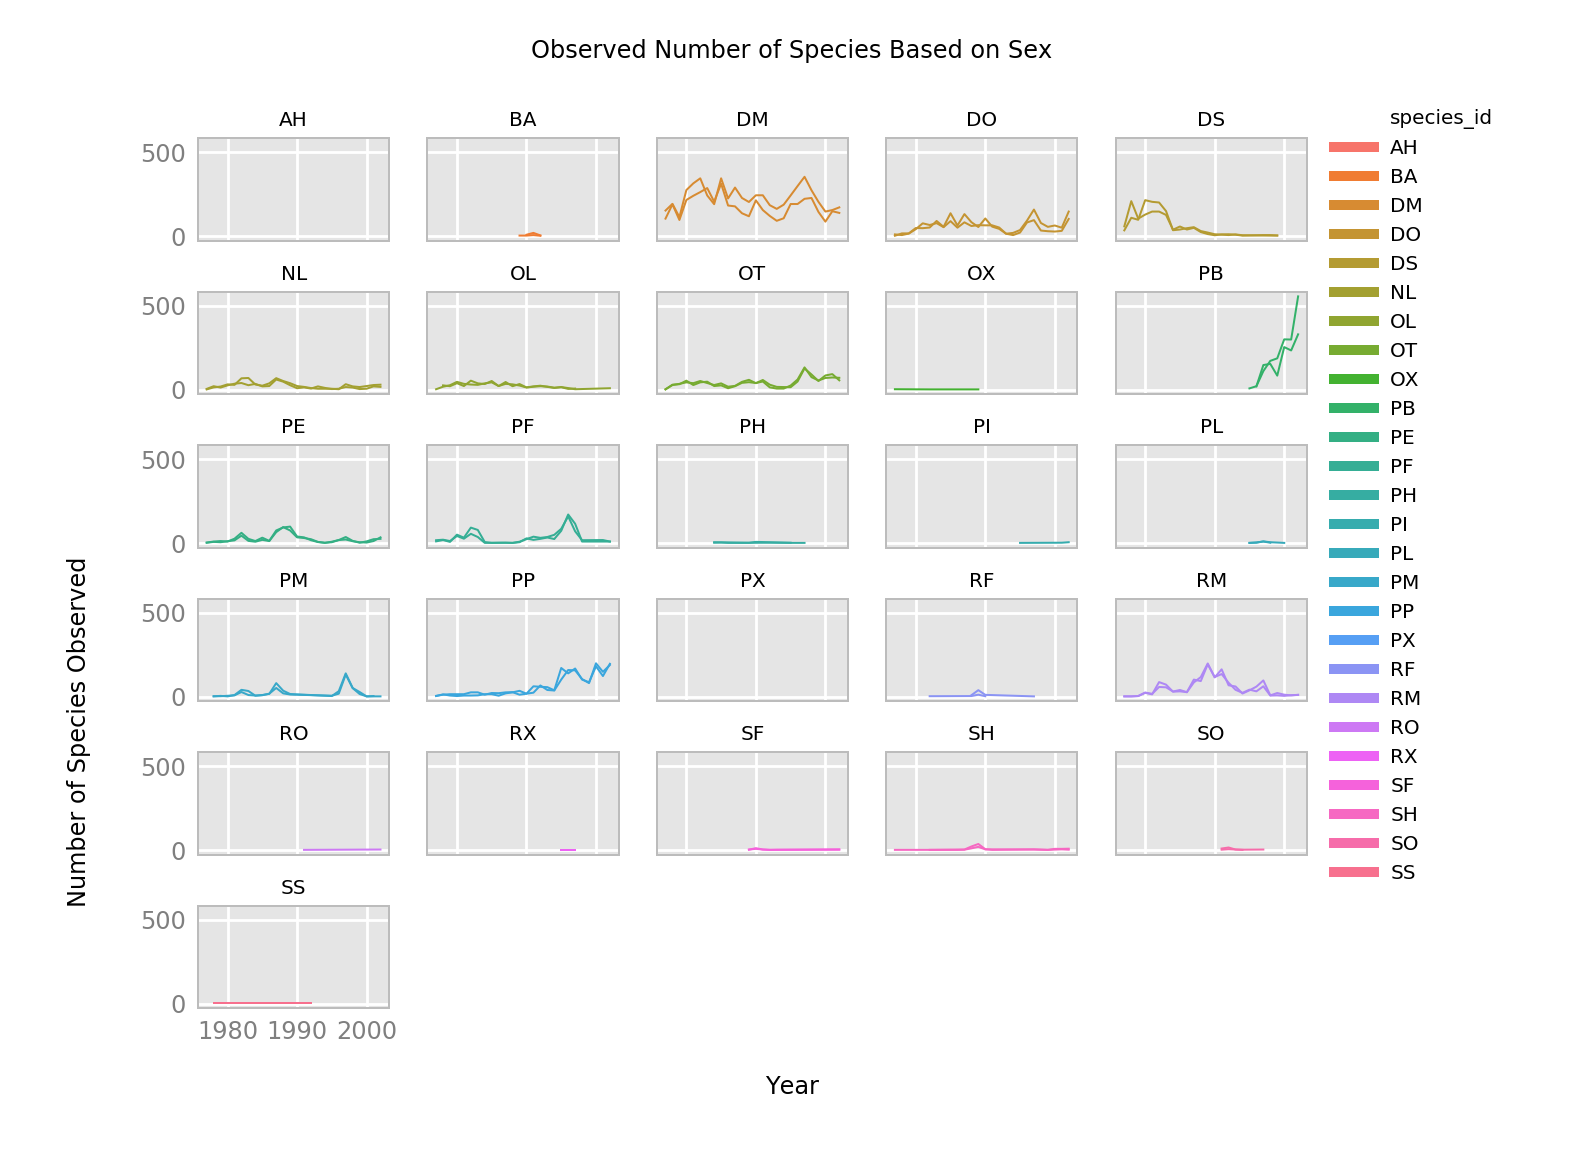

<ggplot: (-9223372036475641228)>

In [133]:
ggplot(aes(x = "year", y = "n", color = "species_id", group = "sex"), data = yearly_sex_counts) + geom_line() + facet_wrap("species_id") \
    + theme() + labs(title = "Observed Number of Species Based on Sex", x = "Year", y = "Number of Species Observed") 

<IPython.core.display.Javascript object>


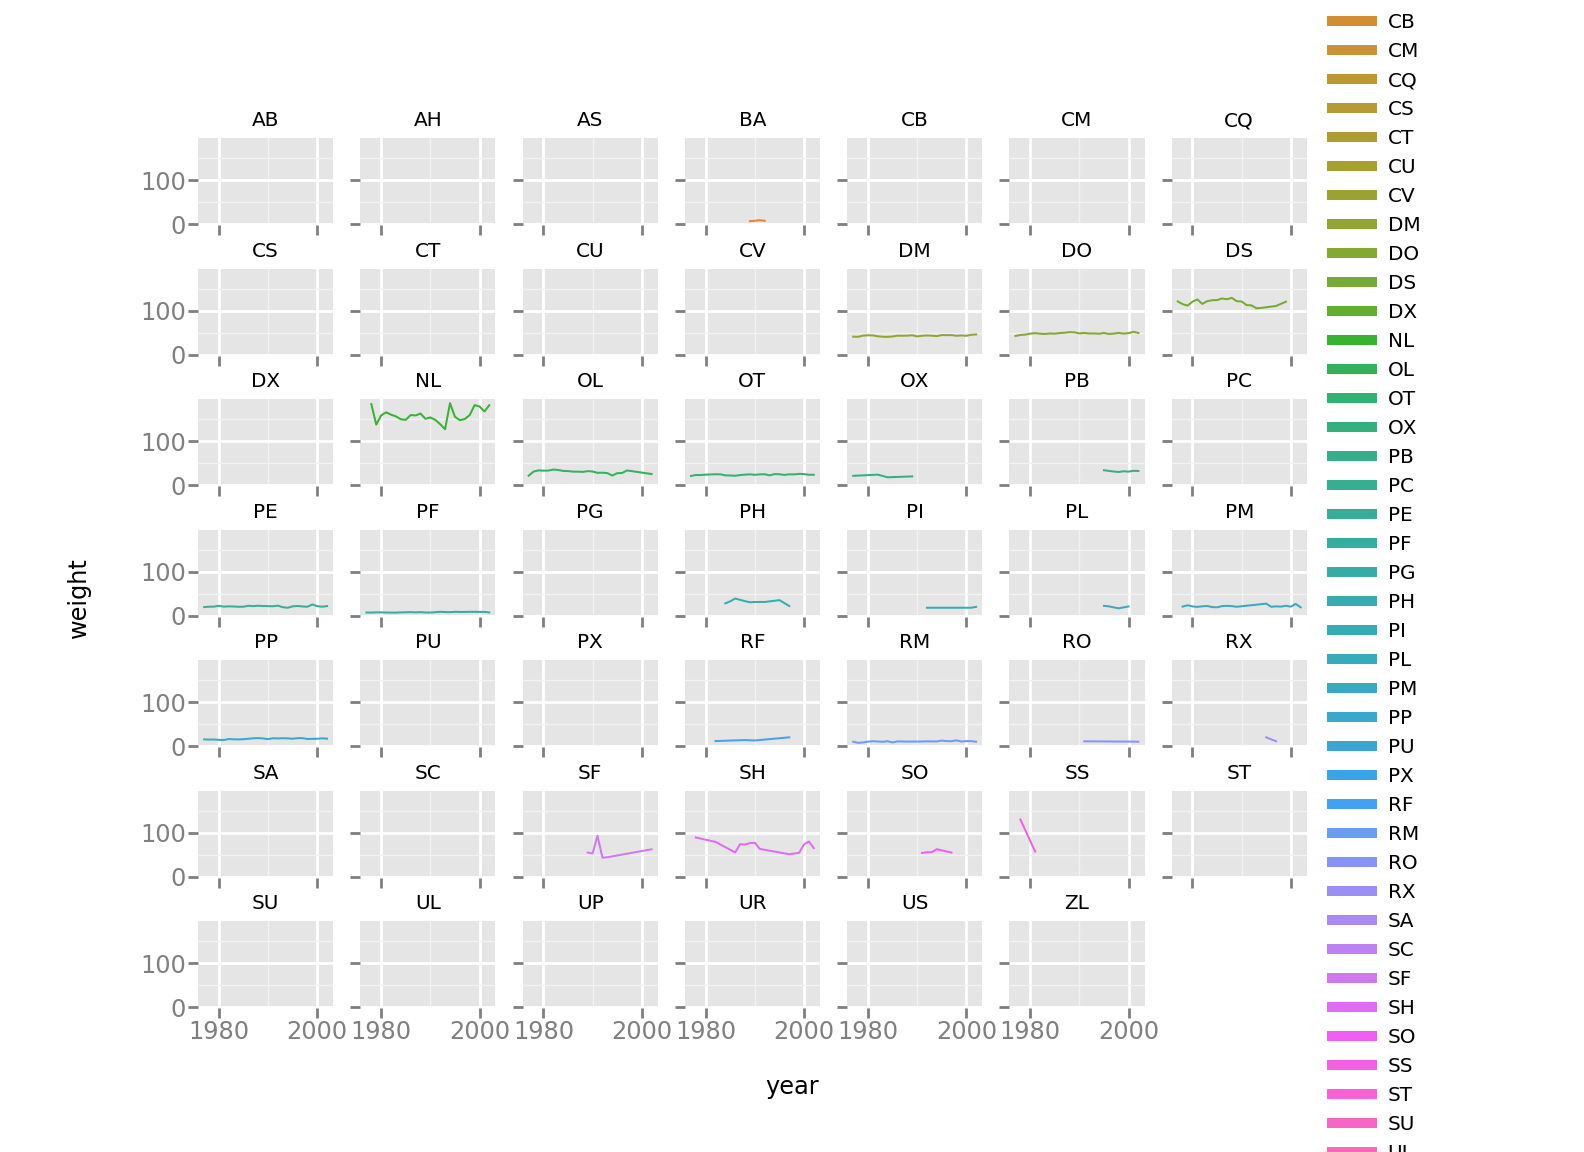

<ggplot: (367202245)>

In [125]:
avg_weights = surveys.groupby(["year", "species_id"]).mean()
avg_weights = avg_weights["weight"].reset_index()
avg_weights
ggplot(aes(x = "year", y = "weight", color = "species_id"), data = avg_weights) + geom_line() + facet_wrap("species_id")